In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.shape

(9994, 13)

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data.drop(['Postal Code'],axis=1,inplace=True)

In [8]:
data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

checked is null then checked is there any duplicate data

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [10]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.shape

(9994, 12)

In [12]:
data.duplicated().sum()

50

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(9944, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

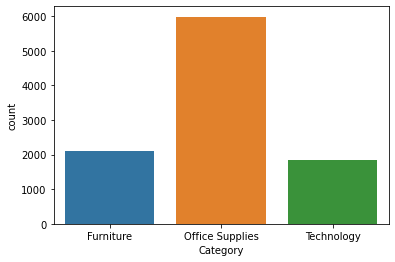

In [16]:
sns.countplot(data['Category'])

<AxesSubplot:ylabel='Sub-Category'>

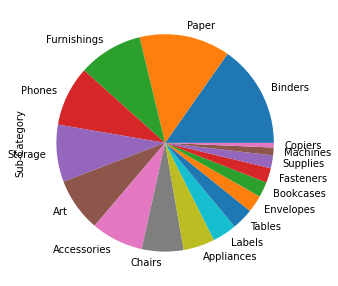

In [17]:
data['Sub-Category'].value_counts().plot(kind='pie',figsize=(10,5))

<AxesSubplot:>

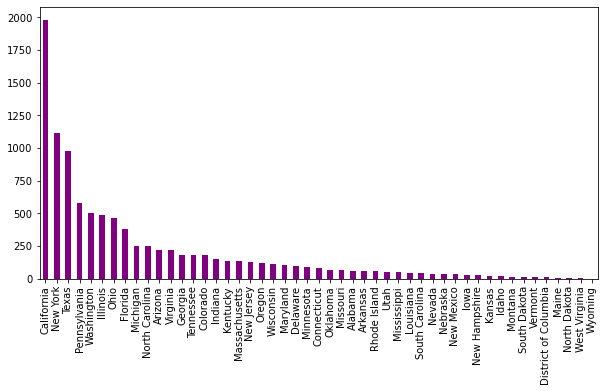

In [18]:
data.State.value_counts().plot(kind='bar',figsize=(10,5),color='purple')

<AxesSubplot:>

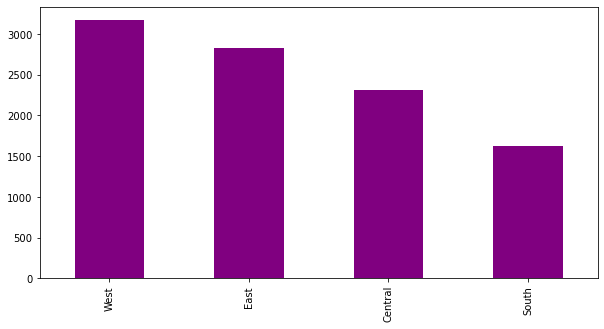

In [19]:
data.Region.value_counts().plot(kind='bar',figsize=(10,5),color='purple')

In [20]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_8288/204611441.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Profit','Sales'].sum().plot(kind='bar',figsize=(30,5))


<AxesSubplot:xlabel='Category'>

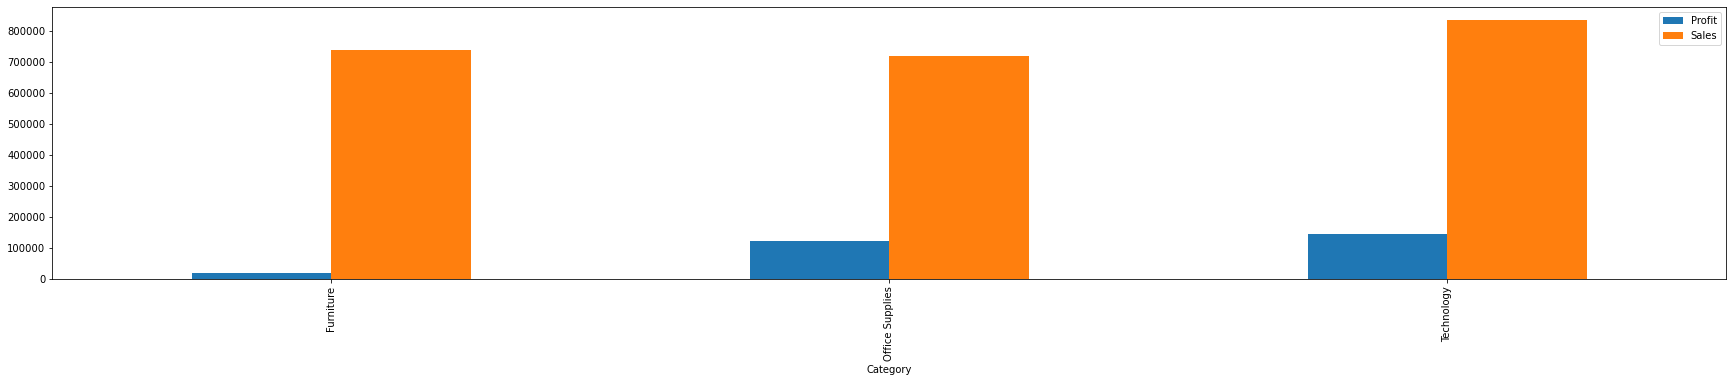

In [21]:
data.groupby('Category')['Profit','Sales'].sum().plot(kind='bar',figsize=(30,5))

Conclusion:furniture has high sales but profits are very less

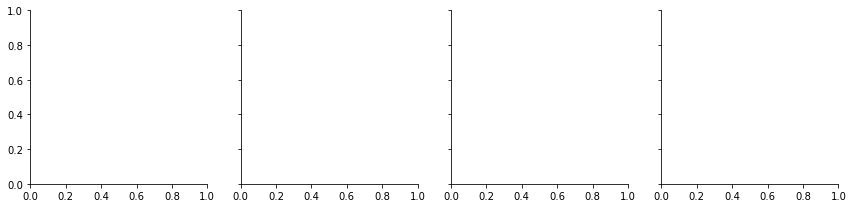

In [22]:
sns.FacetGrid(data,col='Region')

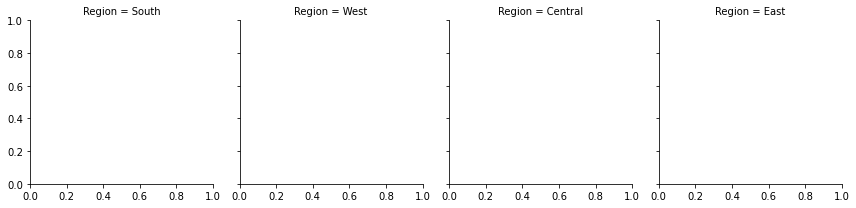

In [23]:
ctg=sns.FacetGrid(data,col='Region')
ctg.map(sns.histplot)

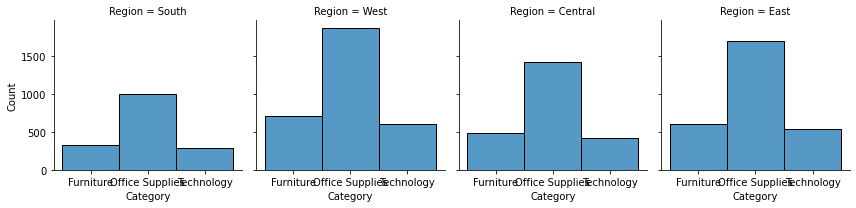

In [24]:
ctg=sns.FacetGrid(data,col='Region')
ctg.map(sns.histplot,'Category')

here i found furniture are sold less in south region

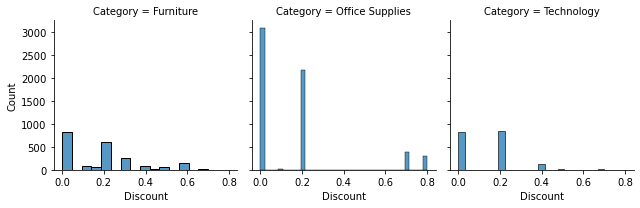

In [25]:
discount=sns.FacetGrid(data,col='Category')
discount.map(sns.histplot,'Discount')

looking above discount frequency for furniture is high but discounted amount is very less. Then went for checking profits and found

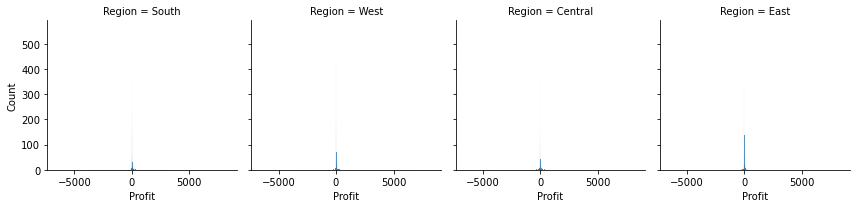

In [28]:
profitdf=sns.FacetGrid(data,col='Region')
profitdf.map(sns.histplot,'Profit')

south region has least profit for all categories

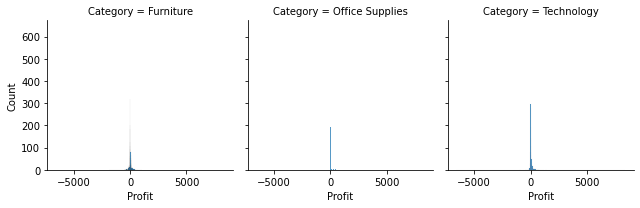

In [26]:
profit=sns.FacetGrid(data,col='Category')
profit.map(sns.histplot,'Profit')

...found that profits are very less for furniture. so to increase profit either increase discount in south region or reduce its sales in south region